In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Examen 

### Justificando la elección del algoritmo 

In [2]:
#Bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
import os

sns.set()   #<-----establecemos el estilo Seaborn por defecto 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv')

In [4]:
# Primer vistazo 
datos.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
# Vista general de tipos de datos y conteo de no nulos 

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Vista general de estadisticas 
datos.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Información basica. 

In [7]:
print('Cantidad de Filas y columnas:', datos.shape)
print('\n')
print('Nombre columnas:',datos.columns)


Cantidad de Filas y columnas: (569, 33)


Nombre columnas: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [8]:
datos.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Manipulando el DataFrame 

- ¿Que caracteristicas nos importan?
- ¿Que caracteristicas podemos eliminar?

In [9]:
datos_copia = datos  #<--- Primeras manipulaciones en una copia del DataFrame original 

lista = ['Unnamed: 32', 'id']
datos_copia_droped = datos_copia.drop(lista, axis = 1) 
datos_copia_droped.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


#### <b> Hemos eliminado las columnas 'Unnamed: 32', 'id' dado a que no son necesarias. </b>

#### <b>¿Importa la columna etiqueta 'diagnosis'? </b> 


# Histogramas vista general

- Calculando bins
   - A traves del metodo empirico de la raiz cuadrada

In [10]:
# calculamos el tamaño de datos_copia_droped con len()
numero_de_datos = len(datos_copia_droped)

# El numero de intervalos (bins) es la raiz cuadrada del numero de datos
n_bins = np.sqrt(numero_de_datos)

#convertimos n_bins a un numero entero 
n_bins = int(n_bins)

print('Numero de datos', numero_de_datos)
print('bins a utilizar', n_bins)


Numero de datos 569
bins a utilizar 23


In [11]:
# Donde guardar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


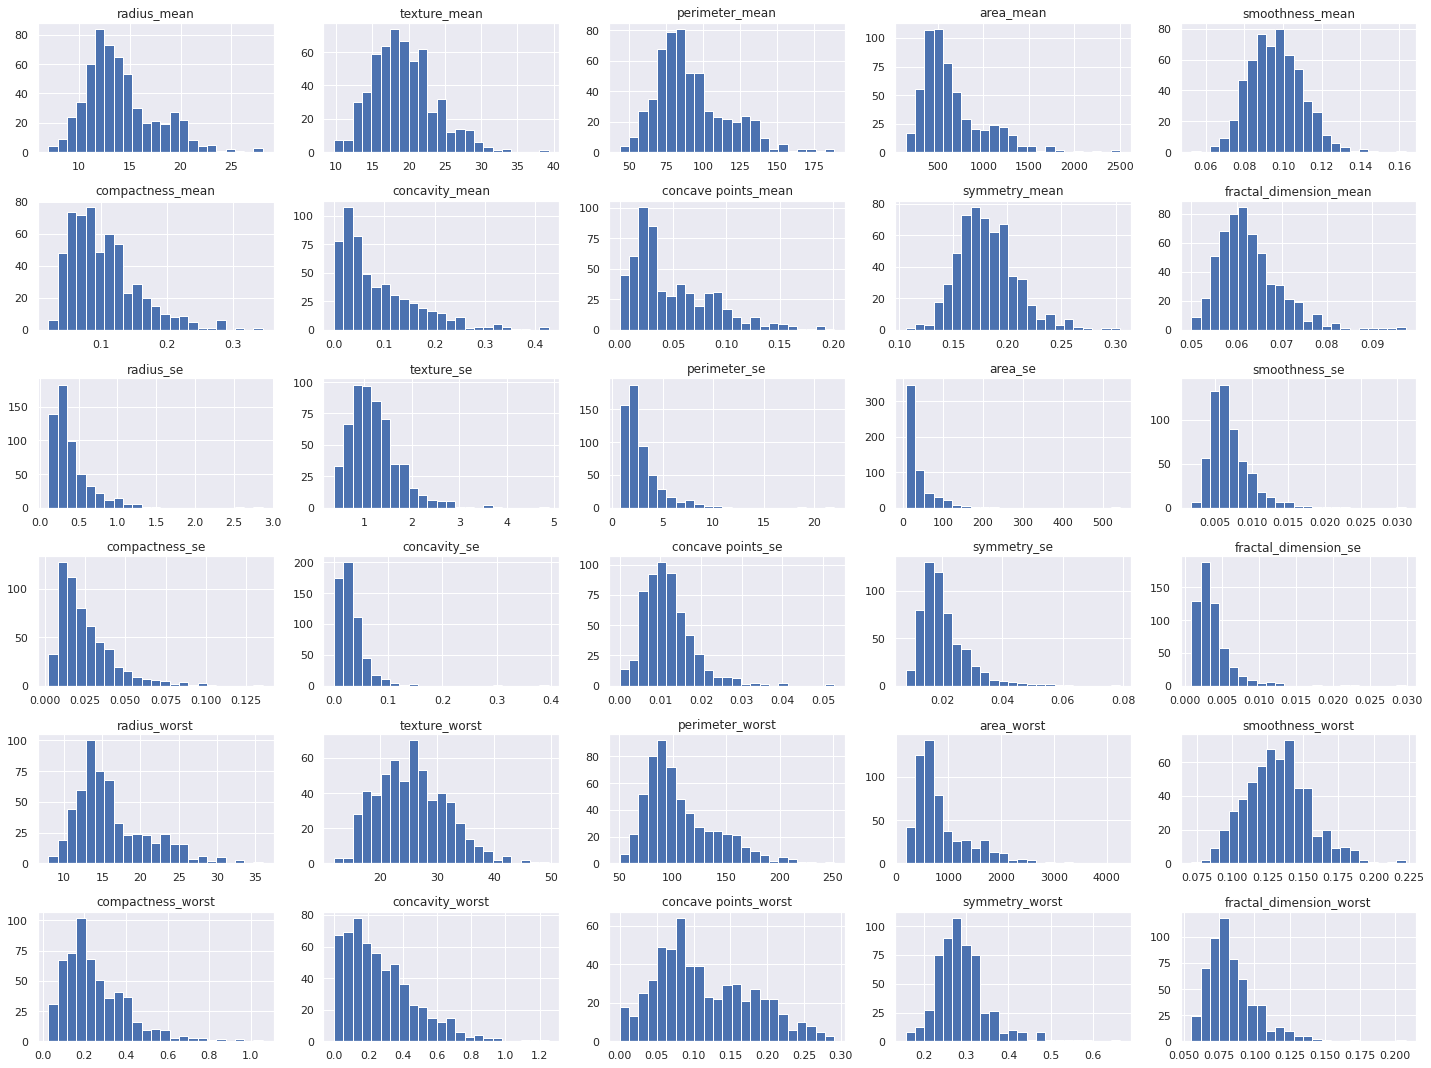

In [12]:
datos_copia_droped.hist(bins=23, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## <B> Histograma Diagnostico de Radius_mean </B>
  - <b>Maligno vs Benigno  </b> 

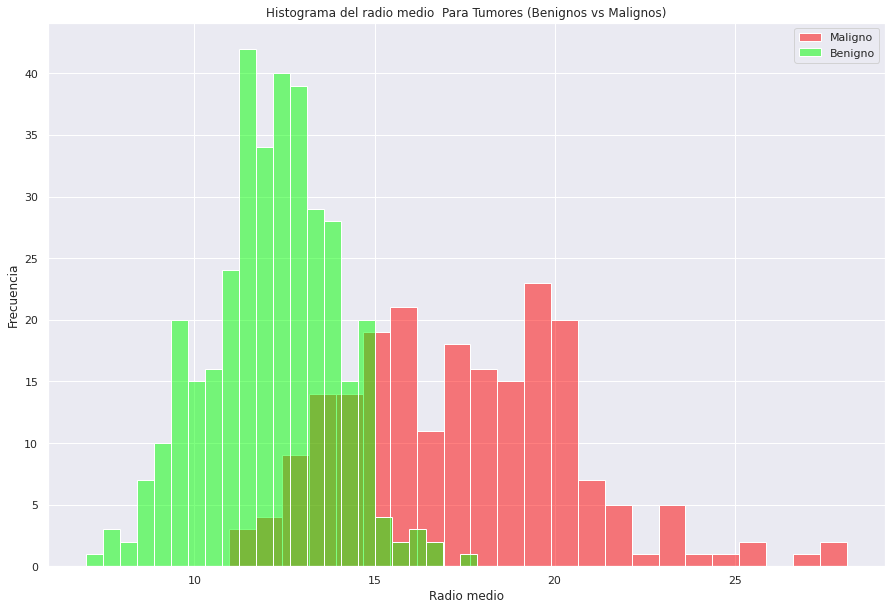

In [13]:
plt.figure(figsize = (15,10))
m = plt.hist(datos_copia_droped[datos_copia_droped["diagnosis"] == "M"].radius_mean, bins=23,fc = (1,0,0,0.5),label = "Maligno")
b = plt.hist(datos_copia_droped[datos_copia_droped["diagnosis"] == "B"].radius_mean,bins=23,fc = (0,1,0,0.5),label = "Benigno")
plt.legend()
plt.xlabel("Radio medio")
plt.ylabel("Frecuencia")
plt.title("Histograma del radio medio  Para Tumores (Benignos vs Malignos)")
plt.show()


In [14]:
frecuencia_radio_medio_M = m[0].max()
index_frecuencia_radio_medio_M = list(m[0]).index(frecuencia_radio_medio_M)
mayor_frecuencia_radio_medio_M = m[1][index_frecuencia_radio_medio_M]
print("La media de los radios Malignos mas frecuente: ",mayor_frecuencia_radio_medio_M)

print('\n')

frecuencia_radio_medio_B = b[0].max()
index_frecuencia_radio_medio_B = list(b[0]).index(frecuencia_radio_medio_B)
mayor_frecuencia_radio_medio_B = b[1][index_frecuencia_radio_medio_B]
print("La media de los radios Benignos mas frecuente: ",mayor_frecuencia_radio_medio_B)


La media de los radios Malignos mas frecuente:  19.15695652173913


La media de los radios Benignos mas frecuente:  11.23408695652174


## <b> Primeras conclusiones </b> 

- La media de los radios Malignos es mas grande que la de los Benignos. 

- Podemoa notar que el histograma de los radios benignos se asemeja a una normal, ademas que contiene algunos valores atipicos (outliers)


### <b>Un problema con los histogramas es que el conjunto de datos puede verse diferente dependiendo de como se elijan los bins y la elección de bins es arbitraria en muchos sentidos.</b>

- Esto lleva a sesgos: puede interpretar su grafico de manera diferente para dos opciones diferentes de numero de bines 

- otro detalle es que en los histogramas. No graficamos todos los datos. Estamos barriendo los datos en bines y perdiendo su valor real. 

Para remediar esto. utilizamos una Bee swarm plot

###  <b>Bee swarm plot </b>

- Un requisito para que use una Bee swarm plot es que sus datos esten en un Pandas bien organizado.
  - cada columna es una caracteristica y cada renglón una observación 
    - En nuestro caso nuestro Dataset esta completamente ordenado 

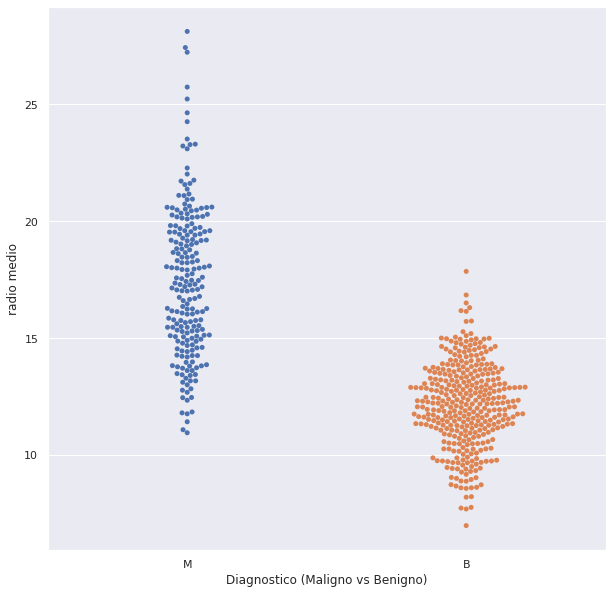

In [15]:
_ = plt.figure(figsize = (10,10))
sns.swarmplot(x = 'diagnosis', y = 'radius_mean', data = datos_copia_droped)
_ = plt.xlabel('Diagnostico (Maligno vs Benigno)')
_ = plt.ylabel('radio medio')
plt.show()


### <B> Conclusión </B>

 - El radio medio tiende a ser mayor en el grupo Maligno
 - Intuitivamente podemos ver que existe un gran cantidad de valores atipicos en ambos grupos 

### <b>Box plot </b>

- Una Box plot nos puede ser util para ver mucho mejor aquellos valores atipicos


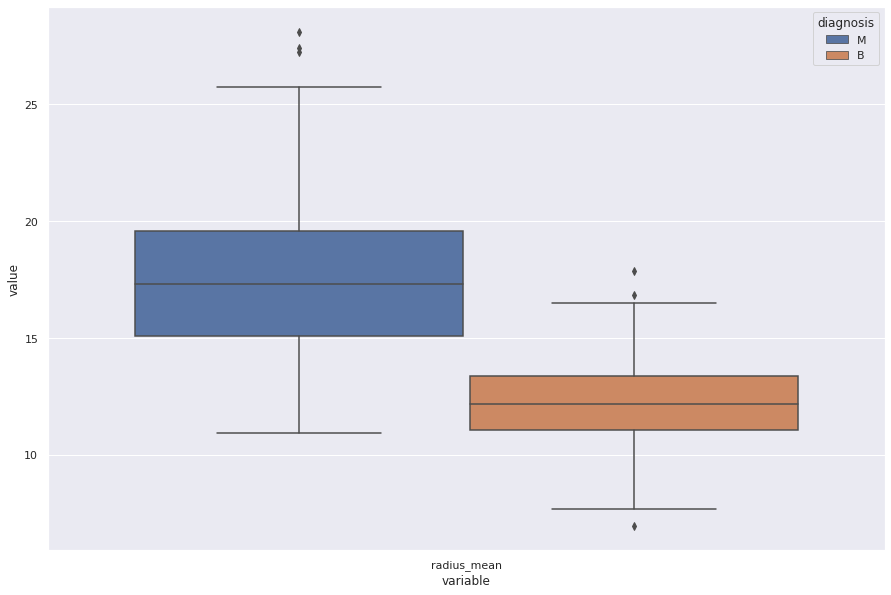

In [16]:
melted_data = pd.melt(datos_copia_droped,id_vars = "diagnosis",value_vars = 'radius_mean')
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

## Función de distribución acumulativa empírica o ECDFs

<b>El ECDF: </b> 
- Estima la verdadera función de densidad acumulativa subyacente de los puntos en la muestra; Se garantiza
    virtualmente que converge con la distribución verdadera a medida que el tamaño de la muestra se hace lo suficientemente grande.
    
- Es la probabilidad de que la variable tme un valor menor o igual a x. $ p(x <= 1) $

In [17]:
# Función para calcular un ECDF: devuelve x y y del ECDF
import numpy as np 
def ecdf(datos): 
    n = len(datos) #<------ Numero de puntos de datos
    x = np.sort(datos) #<----- ordena los datos 
    y = np.arange(1, len(x) + 1)/n #<------ datos especificamos uniformemente con maximo de uno 
    return x, y  #<--------- Regresar valores para x y y


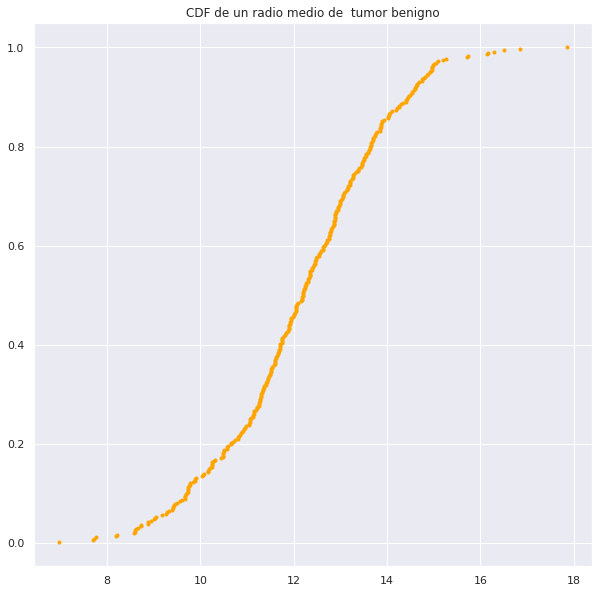

In [18]:
datos_B = datos_copia_droped[datos_copia_droped["diagnosis"] == "B"]

#hustograma del radio medio de los benignos 

# calculando el ECDF para veriscolor data
x_B, y_B = ecdf(datos_B['radius_mean'])

plt.figure(figsize = (10,10))
plt.plot(x_B, y_B, marker = '.', color = 'orange', linestyle = 'none')
_ = plt.title('CDF de un radio medio de  tumor benigno')

plt.show()

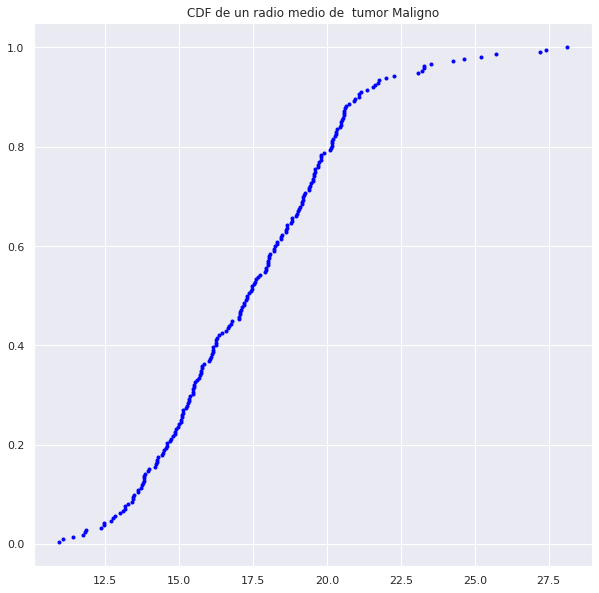

In [19]:
# filtrando el dataset
datos_M = datos_copia_droped[datos_copia_droped["diagnosis"] == "M"]

x_M, y_M = ecdf(datos_M['radius_mean'])

plt.figure(figsize = (10,10))
plt.plot(x_M, y_M, marker = '.', color = 'blue', linestyle = 'none')
_ = plt.title('CDF de un radio medio de  tumor Maligno')

plt.show()


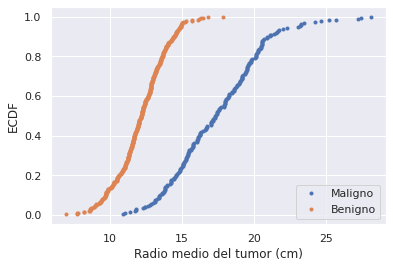

In [20]:
_ = plt.plot(x_M, y_M, marker = '.', linestyle = 'none')

_ = plt.plot(x_B, y_B, marker = '.', linestyle = 'none')

_ = plt.legend(('Maligno', 'Benigno', 'virginica'), loc ='lower right')
_ = plt.xlabel('Radio medio del tumor (cm)')
_ = plt.ylabel('ECDF')

plt.show()

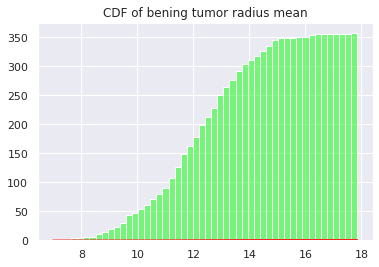

In [21]:

datos_B1 = datos_copia_droped[datos_copia_droped['diagnosis'] == 'B']

plt.hist(datos_B1.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',cumulative = True)

sorted_data = np.sort(datos_B1.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y, color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

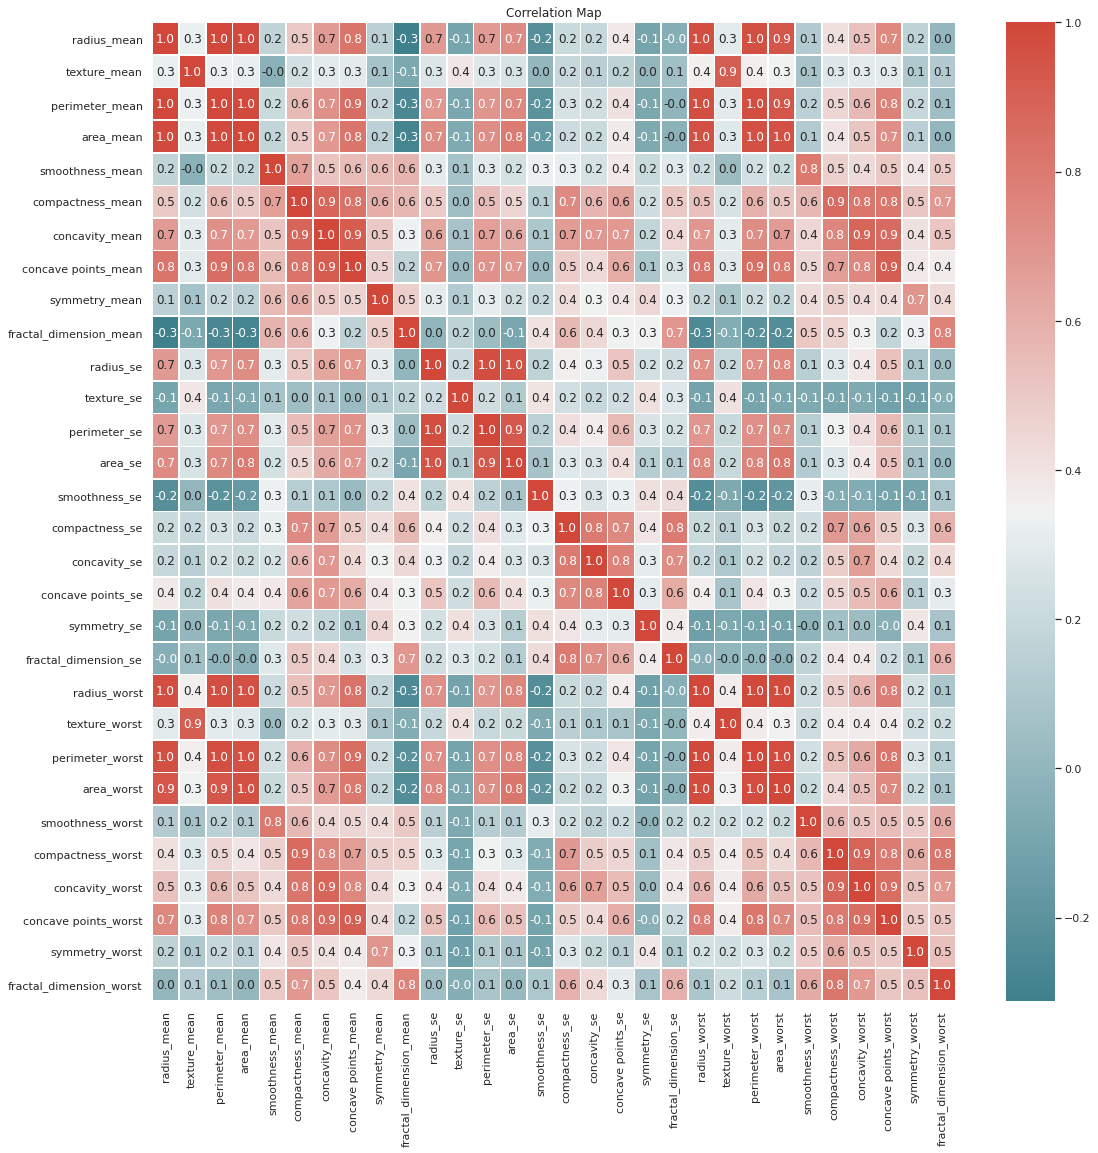

In [22]:
f,ax=plt.subplots(figsize = (18,18))
cmap = sns.diverging_palette(210, 15, as_cmap=True)
sns.heatmap(datos_copia_droped.corr(),annot= True,linewidths=0.5, cmap = cmap, fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [23]:
correlacion = datos_copia_droped.corr()
correlacion = correlacion.round(2)

### Mejores variables correlacionadas con radius_mean

In [24]:
correlacion.radius_mean[correlacion.radius_mean > .4]

radius_mean             1.00
perimeter_mean          1.00
area_mean               0.99
compactness_mean        0.51
concavity_mean          0.68
concave points_mean     0.82
radius_se               0.68
perimeter_se            0.67
area_se                 0.74
radius_worst            0.97
perimeter_worst         0.97
area_worst              0.94
compactness_worst       0.41
concavity_worst         0.53
concave points_worst    0.74
Name: radius_mean, dtype: float64

### <b>¿Multicolineaidad? </b> 

- Recordemos que la multicolinealidad es la relación de dependencia lineal fuerte entre más de dos variables explicativas en una regresión múltiple que incumple el supuesto de Gauss-Markov cuando es exacta.







- Vemos que existe una alta correlación 

# Implementación

- Al notebook **S1_Examen_ImplementaciónLR**

# Justificación del Modelo

De acuerdo a el EDA anterior llegamos a las siguiente conclusión en lo general, La utilización de un  modelo de regresión logística aplicados a las observaciones de las caracteristicas de `celulas cancerigenas` y `células no cancerigenas` nos permiten el análisis de los resultados en términos explicativos y predictivos"

- La RL es un buen soporte para investigar si una o varias variables explican una variable dependien­te ("diagnostico") que toma un carácter cualitativo mismo que re­presenta la existencia o no de un efecto de interés en este caso la clasificación de celulas cancerigenas y no cancerigenas.
- RL tiene una doble función: explicativa y predictiva.
- La función logística es aquella que halla, para cada individuo según los valores de una serie de variables (Xi), la probabilidad (p) de que presente el efecto cancerigeno P(y=1|x1,...xd). 
- es un hiperplano modificado,utiliza probabilidad para clasificar

## Interpretación de los resultados

Una RL lo que pretendemos es estimar los parámetros de la ecuación (β0, β1, β2,...βk) de la función que pretendemos evaluar:

Z =β0 + β1X1 + β2X2 +... +βkXk

P(y=1|x1,...xd)

Función Sigmoide

P>.5 (hiperparametro) -- umbral modificable FP / TP

### Conclusión
La LR predice un riesgo del **95%** de pade­cer una enfermedad cancerigena.